In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

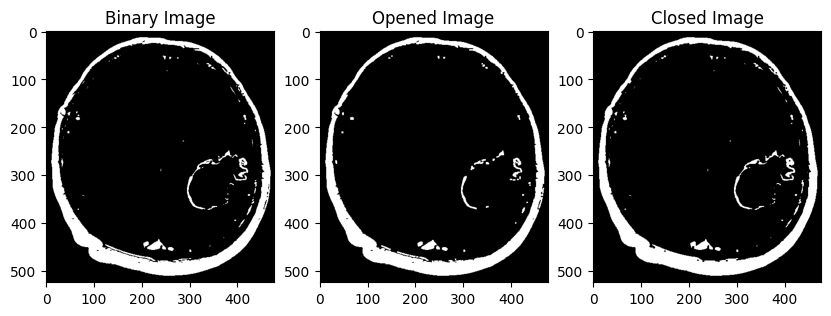

In [18]:
# Load the binary image (assuming you've already binarized and inverted the image)
img = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold to ensure it's a binary image (if it's not already)
ret, binary_img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)

# Define a kernel (structuring element) for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Step 1: Erosion (erode the binary image)
def erode(image, kernel):
    img_eroded = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extracting the 3x3 region around the current pixel
            region = image[i-1:i+2, j-1:j+2]
            # Apply the erosion rule: if all pixels under the kernel are 255 (white), the center pixel stays white
            if np.all(region == kernel * 255):
                img_eroded[i, j] = 255
            else:
                img_eroded[i, j] = 0
    return img_eroded

# Step 2: Dilation (dilate the binary image)
def dilate(image, kernel):
    img_dilated = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extracting the 3x3 region around the current pixel
            region = image[i-1:i+2, j-1:j+2]
            # Apply the dilation rule: if any pixel under the kernel is white, the center pixel becomes white
            if np.any(region == 255):
                img_dilated[i, j] = 255
            else:
                img_dilated[i, j] = 0
    return img_dilated

# Opening: Erosion followed by Dilation
eroded_img = erode(binary_img, kernel)
opened_img = dilate(eroded_img, kernel)

# Closing: Dilation followed by Erosion
dilated_img = dilate(binary_img, kernel)
closed_img = erode(dilated_img, kernel)

# Display the original binary, opened, and closed images
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.title("Binary Image")
plt.imshow(binary_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Opened Image")
plt.imshow(opened_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Closed Image")
plt.imshow(closed_img, cmap='gray')

plt.show()


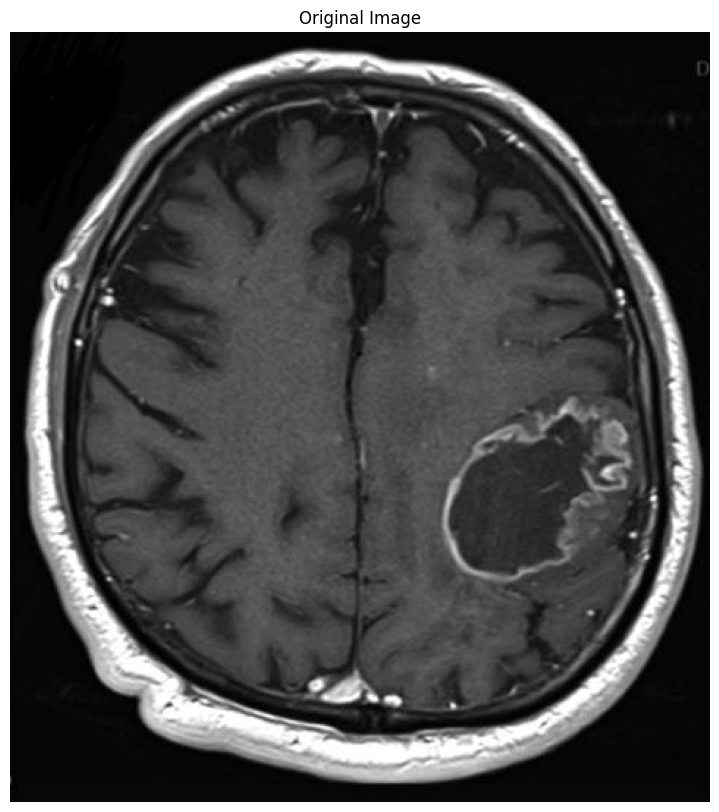

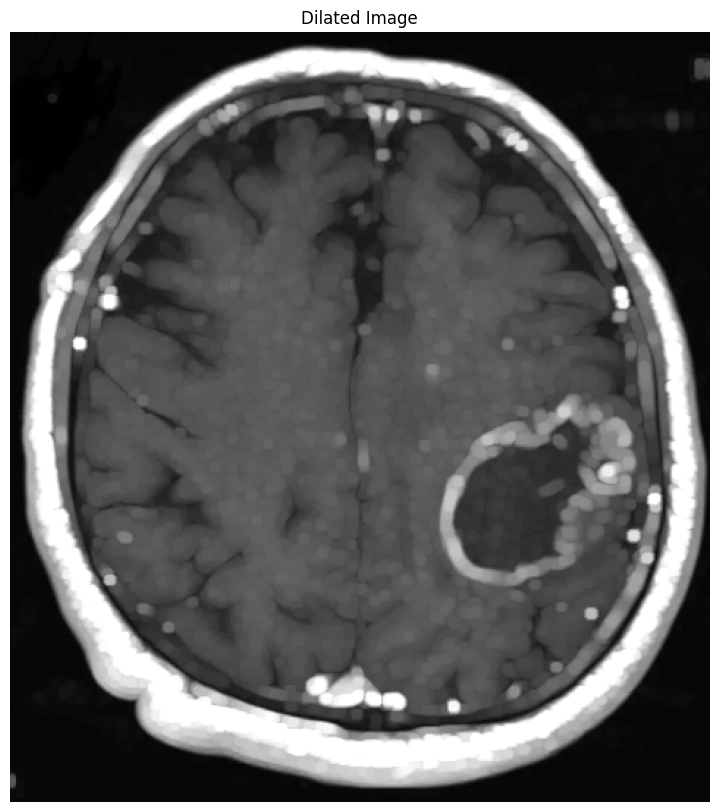

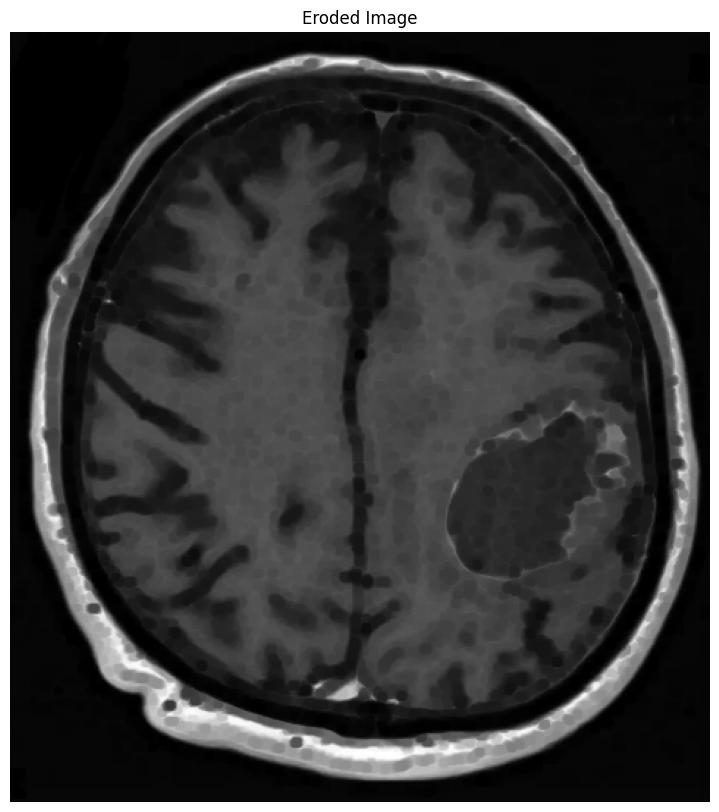

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define a custom 4x4 kernel for grayscale morphology (customize this if needed)
kernel = np.array([[0, 1, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 1, 0]], dtype=np.uint8)

# Perform grayscale dilation
dilated_image = cv2.dilate(image, kernel)

# Perform grayscale erosion
eroded_image = cv2.erode(image, kernel)

# Display the dilated image
plt.figure(figsize=(10,10))
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')
plt.show()

# Display the eroded image
plt.figure(figsize=(10,10))
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()


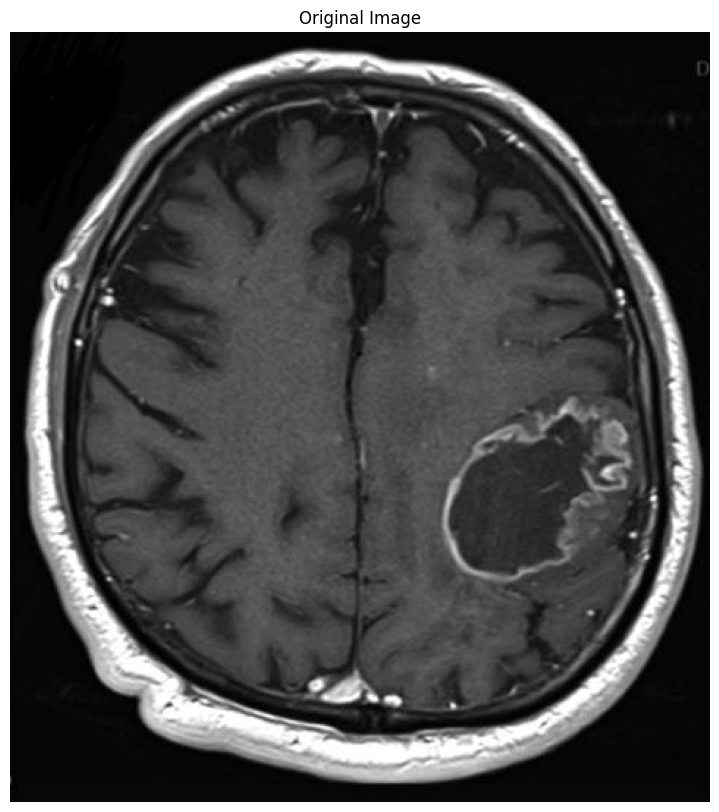

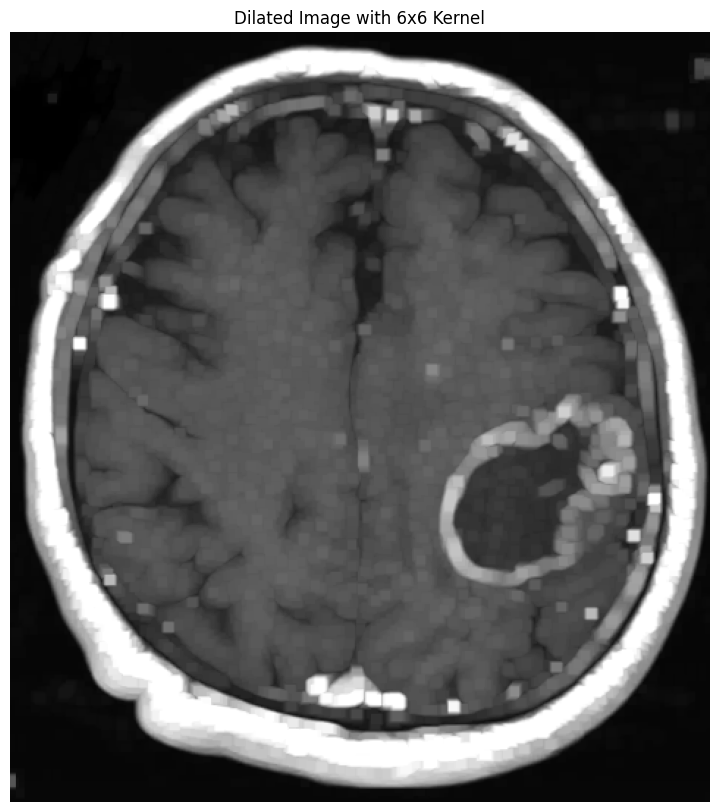

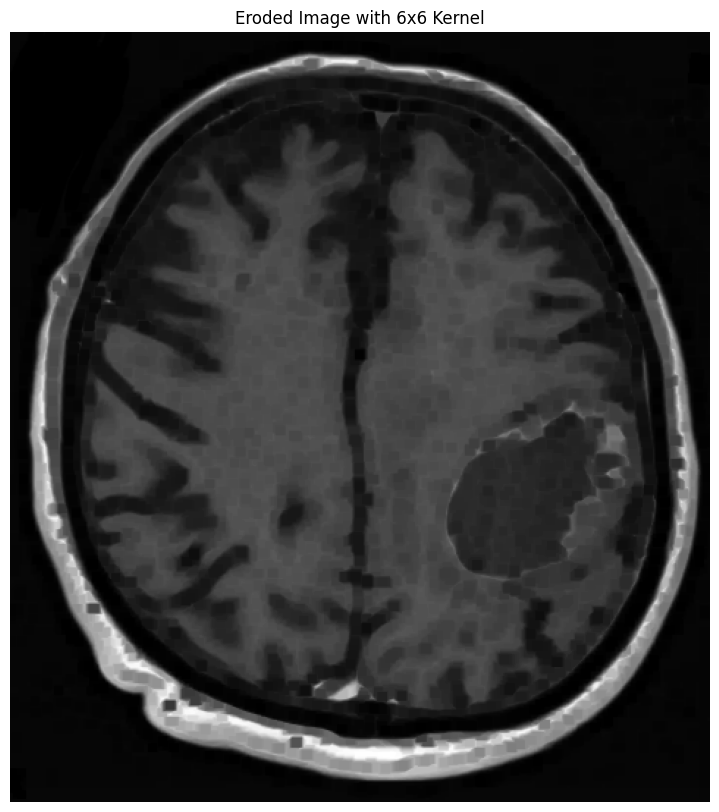

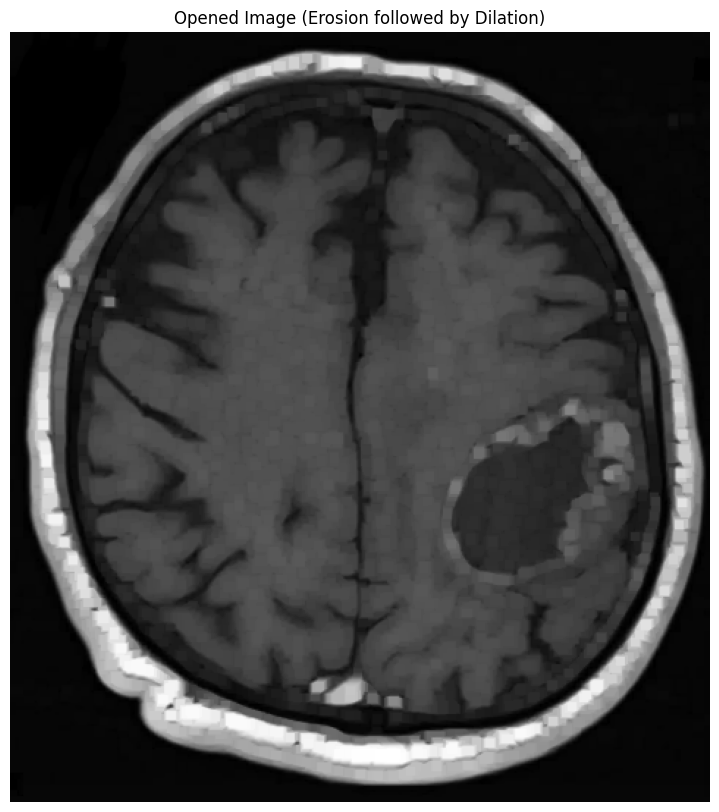

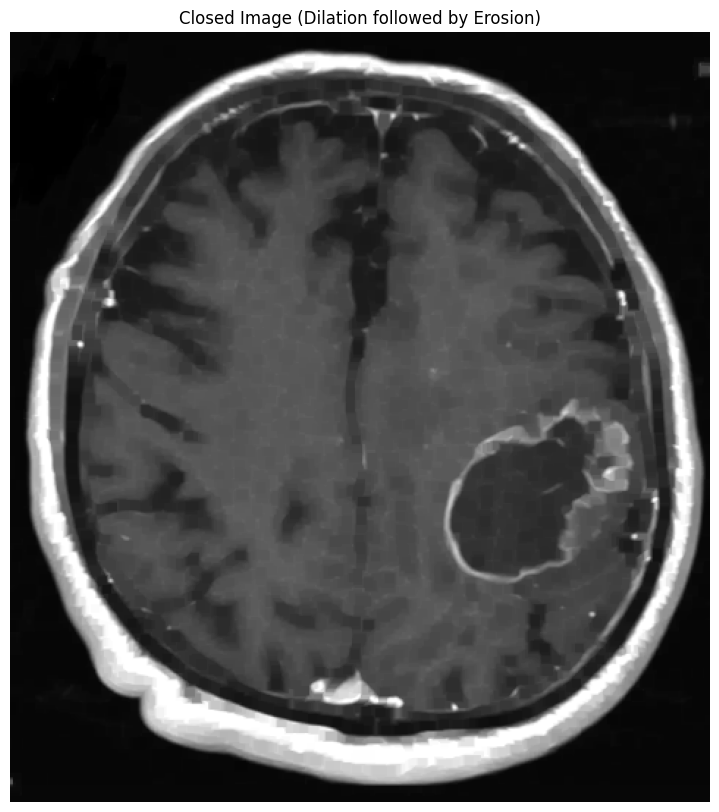

In [20]:
# Load the image in grayscale
image = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# Define a custom 6x6 kernel for grayscale morphology
kernel = np.ones((6, 6), dtype=np.uint8)

# Perform grayscale dilation with 6x6 kernel
dilated_image = cv2.dilate(image, kernel)

# Perform grayscale erosion with 6x6 kernel
eroded_image = cv2.erode(image, kernel)

# Perform opening (erosion followed by dilation)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Perform closing (dilation followed by erosion)
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the dilated image
plt.figure(figsize=(10,10))
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image with 6x6 Kernel')
plt.axis('off')
plt.show()

# Display the eroded image
plt.figure(figsize=(10,10))
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image with 6x6 Kernel')
plt.axis('off')
plt.show()

# Display the opened image
plt.figure(figsize=(10,10))
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image (Erosion followed by Dilation)')
plt.axis('off')
plt.show()

# Display the closed image
plt.figure(figsize=(10,10))
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image (Dilation followed by Erosion)')
plt.axis('off')
plt.show()


Gradient methods (interior and then exterior) using dilation and erosion images

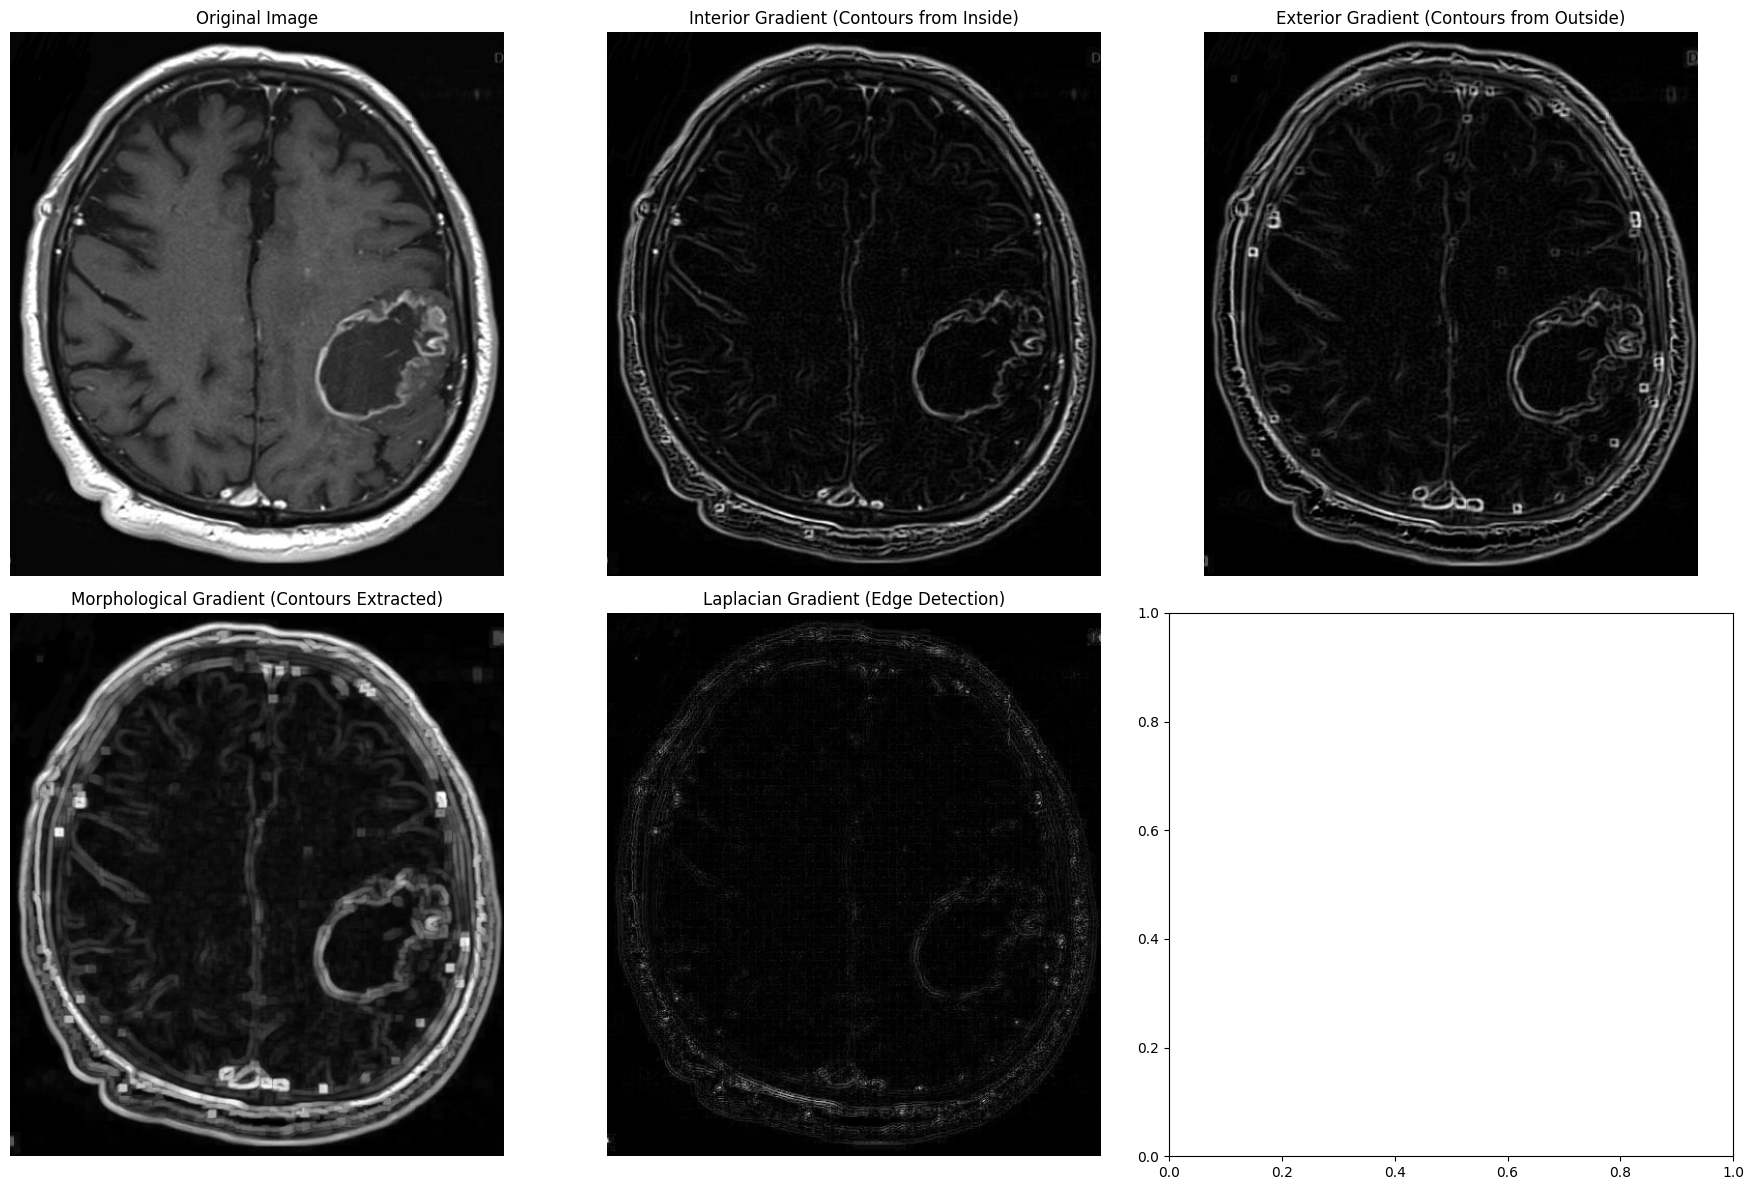

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image in grayscale
image = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)

# Create an elliptical kernel (25x25)
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

# Perform dilation and erosion using the kernel
dilated_image = cv2.dilate(image, kernel)
eroded_image = cv2.erode(image, kernel)

# Calculate interior gradient: Original Image - Eroded Image
interior_gradient = cv2.subtract(image, eroded_image)

# Calculate exterior gradient: Dilated Image - Original Image
exterior_gradient = cv2.subtract(dilated_image, image)

# Calculate the morphological gradient (dilation - erosion)
morph_gradient = cv2.subtract(dilated_image, eroded_image)



# Calculate the Laplacian using the new formula
laplacian_gradient1 = cv2.subtract(cv2.add(image, image), cv2.add(dilated_image, eroded_image))



# Set up subplots to show 6 images in 2 rows, 3 columns each
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot each image in the grid
images = [image, interior_gradient, exterior_gradient, morph_gradient, laplacian_gradient]
titles = ['Original Image', 'Interior Gradient (Contours from Inside)', 'Exterior Gradient (Contours from Outside)',
          'Morphological Gradient (Contours Extracted)', 'Laplacian Gradient (Edge Detection)']

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Adjust layout and show all images in a grid
plt.tight_layout()
plt.show()


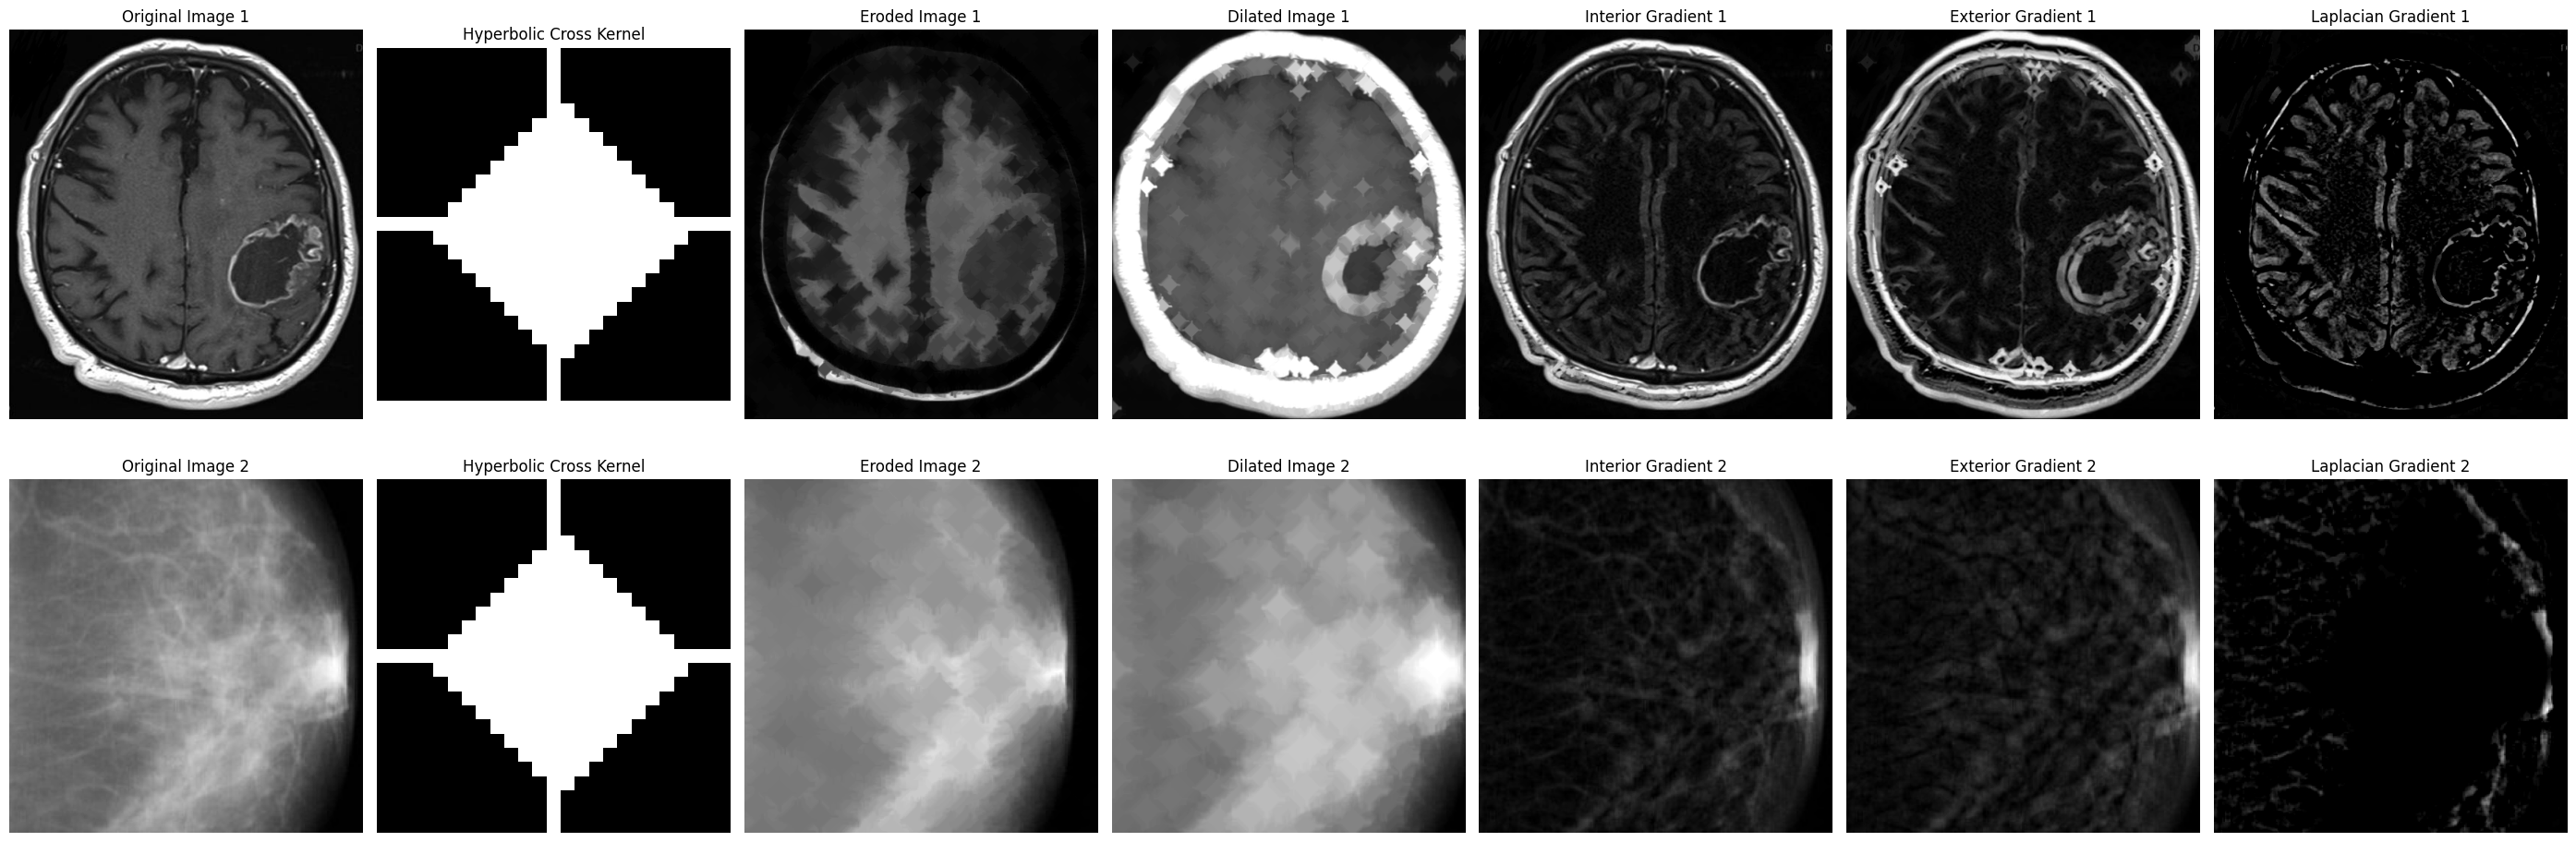

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the MRI image in grayscale
image1 = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('breast256.png', cv2.IMREAD_GRAYSCALE)

# Create an arc-like hyperbolic cross kernel (25x25)
kernel_hyperbolic_cross = np.zeros((25, 25), dtype=np.uint8)
kernel_hyperbolic_cross[12, :] = 1  # Middle row
kernel_hyperbolic_cross[:, 12] = 1  # Middle column

# Add arc-like white pixels in each quadrant
for i in range(25):
    for j in range(25):
        # Fill each quadrant with an arc-like pattern
        if (i < 12 and j < 12) and (i + j > 15):  # Top-left
            kernel_hyperbolic_cross[i, j] = 1
        if (i < 12 and j > 12) and (i + (25 - j) > 15):  # Top-right
            kernel_hyperbolic_cross[i, j] = 1
        if (i > 12 and j < 12) and ((25 - i) + j > 15):  # Bottom-left
            kernel_hyperbolic_cross[i, j] = 1
        if (i > 12 and j > 12) and ((25 - i) + (25 - j) > 15):  # Bottom-right
            kernel_hyperbolic_cross[i, j] = 1

# Perform dilation and erosion using the hyperbolic cross kernel for both images
dilated_image1 = cv2.dilate(image1, kernel_hyperbolic_cross)
eroded_image1 = cv2.erode(image1, kernel_hyperbolic_cross)

dilated_image2 = cv2.dilate(image2, kernel_hyperbolic_cross)
eroded_image2 = cv2.erode(image2, kernel_hyperbolic_cross)

# Calculate the interior gradient: Original Image - Eroded Image
interior_gradient1 = cv2.subtract(image1, eroded_image1)
interior_gradient2 = cv2.subtract(image2, eroded_image2)

# Calculate the exterior gradient: Dilated Image - Original Image
exterior_gradient1 = cv2.subtract(dilated_image1, image1)
exterior_gradient2 = cv2.subtract(dilated_image2, image2)

# Calculate the Laplacian using the new formula
laplacian_gradient1 = cv2.subtract(cv2.add(image1, image1), cv2.add(dilated_image1, eroded_image1))
laplacian_gradient2 = cv2.subtract(cv2.add(image2, image2), cv2.add(dilated_image2, eroded_image2))

# Set up subplots to show results for both images and kernel
fig, axes = plt.subplots(2, 7, figsize=(28, 10))

# Plot images for the first image (RMS_516_821_fig01_i1200.jpg)
axes[0, 0].imshow(image1, cmap='gray')
axes[0, 0].set_title('Original Image 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(kernel_hyperbolic_cross, cmap='gray')
axes[0, 1].set_title('Hyperbolic Cross Kernel')
axes[0, 1].axis('off')

axes[0, 2].imshow(eroded_image1, cmap='gray')
axes[0, 2].set_title('Eroded Image 1')
axes[0, 2].axis('off')

axes[0, 3].imshow(dilated_image1, cmap='gray')
axes[0, 3].set_title('Dilated Image 1')
axes[0, 3].axis('off')

axes[0, 4].imshow(interior_gradient1, cmap='gray')
axes[0, 4].set_title('Interior Gradient 1')
axes[0, 4].axis('off')

axes[0, 5].imshow(exterior_gradient1, cmap='gray')
axes[0, 5].set_title('Exterior Gradient 1')
axes[0, 5].axis('off')

axes[0, 6].imshow(laplacian_gradient1, cmap='gray')
axes[0, 6].set_title('Laplacian Gradient 1')
axes[0, 6].axis('off')

# Plot images for the second image (beast256.png)
axes[1, 0].imshow(image2, cmap='gray')
axes[1, 0].set_title('Original Image 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(kernel_hyperbolic_cross, cmap='gray')
axes[1, 1].set_title('Hyperbolic Cross Kernel')
axes[1, 1].axis('off')

axes[1, 2].imshow(eroded_image2, cmap='gray')
axes[1, 2].set_title('Eroded Image 2')
axes[1, 2].axis('off')

axes[1, 3].imshow(dilated_image2, cmap='gray')
axes[1, 3].set_title('Dilated Image 2')
axes[1, 3].axis('off')

axes[1, 4].imshow(interior_gradient2, cmap='gray')
axes[1, 4].set_title('Interior Gradient 2')
axes[1, 4].axis('off')

axes[1, 5].imshow(exterior_gradient2, cmap='gray')
axes[1, 5].set_title('Exterior Gradient 2')
axes[1, 5].axis('off')

axes[1, 6].imshow(laplacian_gradient2, cmap='gray')
axes[1, 6].set_title('Laplacian Gradient 2')
axes[1, 6].axis('off')

# Adjust layout and show all images in a grid
plt.tight_layout()
plt.show()


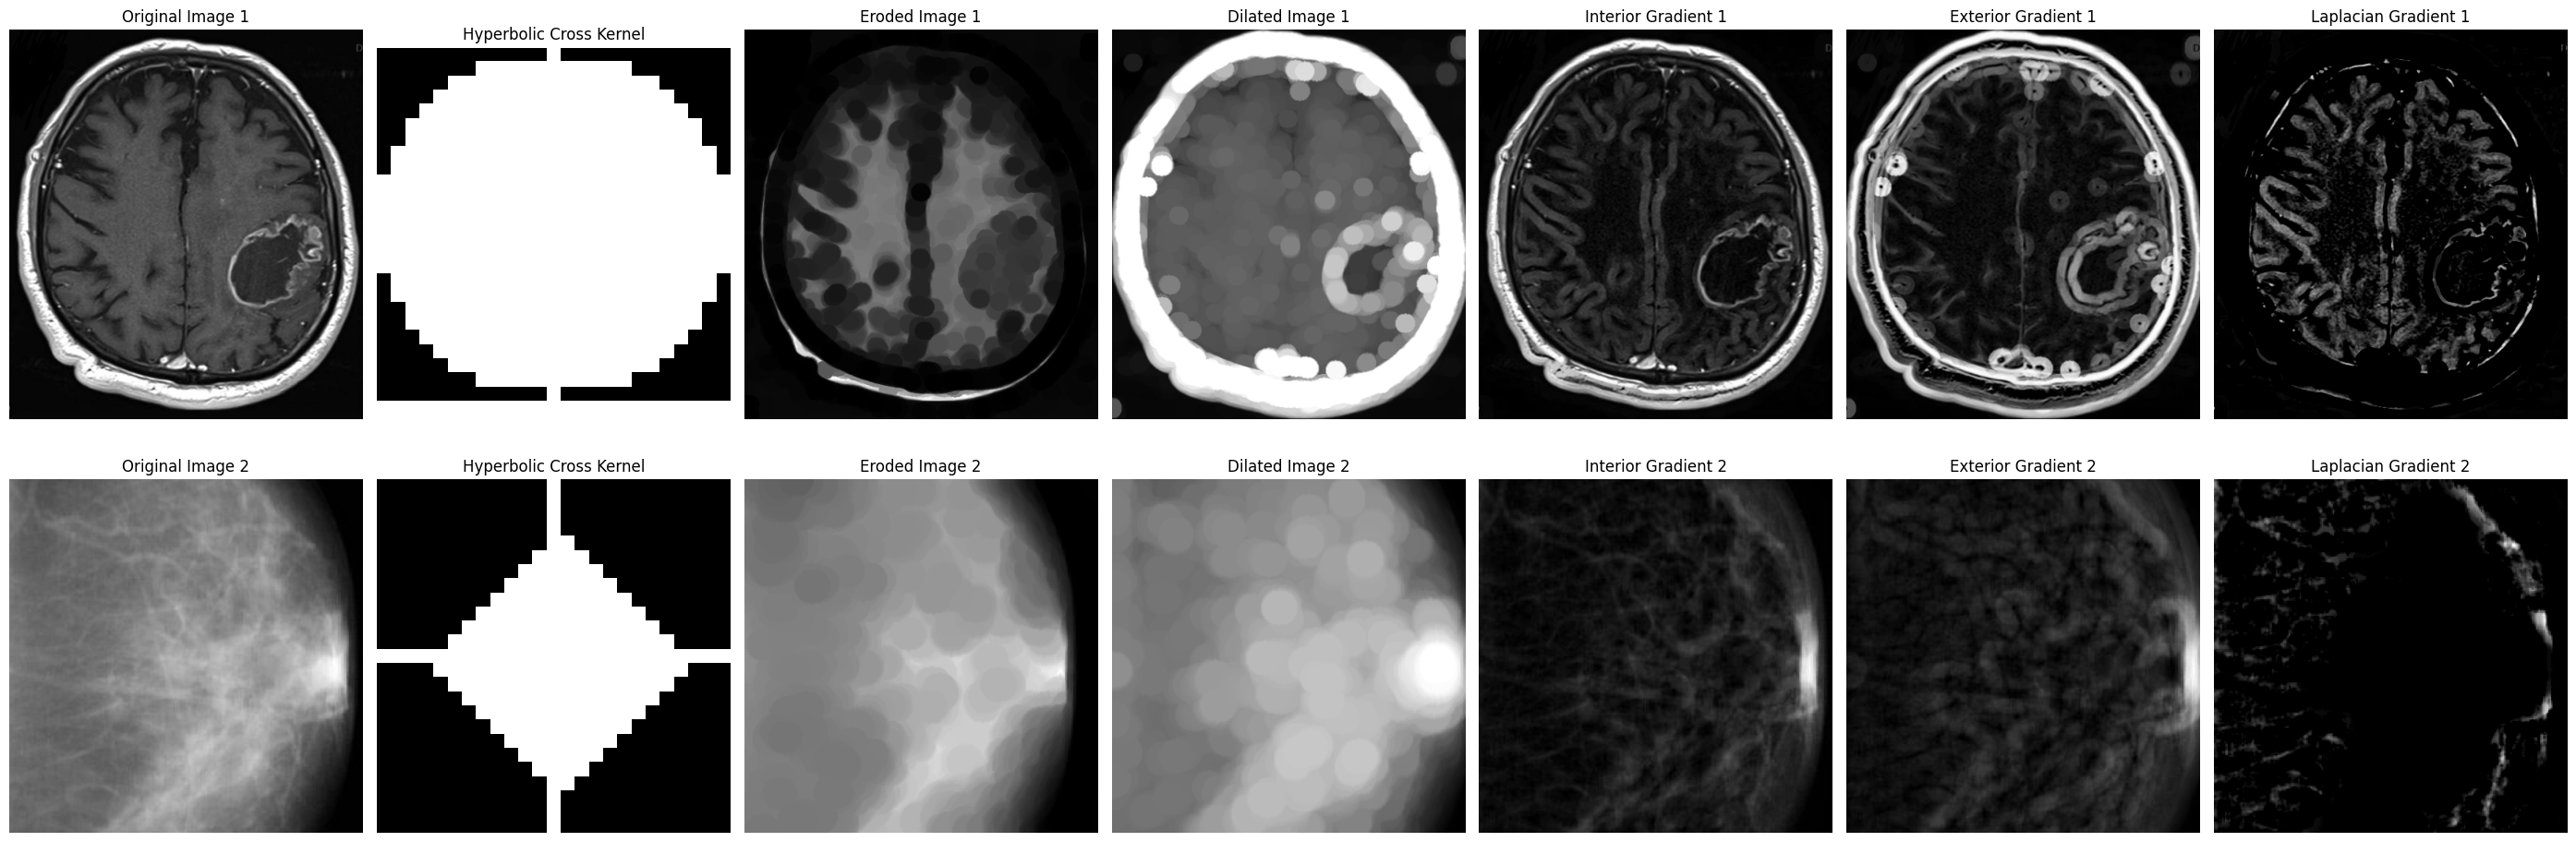

In [38]:
# Load the MRI image in grayscale
image1 = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('breast256.png', cv2.IMREAD_GRAYSCALE)


# Create an elliptical kernel (25x25)
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))




# Perform dilation and erosion using the hyperbolic cross kernel for both images
dilated_image1 = cv2.dilate(image1, kernel_ellipse)
eroded_image1 = cv2.erode(image1, kernel_ellipse)

dilated_image2 = cv2.dilate(image2, kernel_ellipse)
eroded_image2 = cv2.erode(image2, kernel_ellipse)

# Calculate the interior gradient: Original Image - Eroded Image
interior_gradient1 = cv2.subtract(image1, eroded_image1)
interior_gradient2 = cv2.subtract(image2, eroded_image2)

# Calculate the exterior gradient: Dilated Image - Original Image
exterior_gradient1 = cv2.subtract(dilated_image1, image1)
exterior_gradient2 = cv2.subtract(dilated_image2, image2)

# Calculate the Laplacian using the new formula
laplacian_gradient1 = cv2.subtract(cv2.add(image1, image1), cv2.add(dilated_image1, eroded_image1))
laplacian_gradient2 = cv2.subtract(cv2.add(image2, image2), cv2.add(dilated_image2, eroded_image2))

# Set up subplots to show results for both images and kernel
fig, axes = plt.subplots(2, 7, figsize=(28, 10))

# Plot images for the first image (RMS_516_821_fig01_i1200.jpg)
axes[0, 0].imshow(image1, cmap='gray')
axes[0, 0].set_title('Original Image 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(kernel_ellipse, cmap='gray')
axes[0, 1].set_title('Hyperbolic Cross Kernel')
axes[0, 1].axis('off')

axes[0, 2].imshow(eroded_image1, cmap='gray')
axes[0, 2].set_title('Eroded Image 1')
axes[0, 2].axis('off')

axes[0, 3].imshow(dilated_image1, cmap='gray')
axes[0, 3].set_title('Dilated Image 1')
axes[0, 3].axis('off')

axes[0, 4].imshow(interior_gradient1, cmap='gray')
axes[0, 4].set_title('Interior Gradient 1')
axes[0, 4].axis('off')

axes[0, 5].imshow(exterior_gradient1, cmap='gray')
axes[0, 5].set_title('Exterior Gradient 1')
axes[0, 5].axis('off')

axes[0, 6].imshow(laplacian_gradient1, cmap='gray')
axes[0, 6].set_title('Laplacian Gradient 1')
axes[0, 6].axis('off')

# Plot images for the second image (beast256.png)
axes[1, 0].imshow(image2, cmap='gray')
axes[1, 0].set_title('Original Image 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(kernel_hyperbolic_cross, cmap='gray')
axes[1, 1].set_title('Hyperbolic Cross Kernel')
axes[1, 1].axis('off')

axes[1, 2].imshow(eroded_image2, cmap='gray')
axes[1, 2].set_title('Eroded Image 2')
axes[1, 2].axis('off')

axes[1, 3].imshow(dilated_image2, cmap='gray')
axes[1, 3].set_title('Dilated Image 2')
axes[1, 3].axis('off')

axes[1, 4].imshow(interior_gradient2, cmap='gray')
axes[1, 4].set_title('Interior Gradient 2')
axes[1, 4].axis('off')

axes[1, 5].imshow(exterior_gradient2, cmap='gray')
axes[1, 5].set_title('Exterior Gradient 2')
axes[1, 5].axis('off')

axes[1, 6].imshow(laplacian_gradient2, cmap='gray')
axes[1, 6].set_title('Laplacian Gradient 2')
axes[1, 6].axis('off')

# Adjust layout and show all images in a grid
plt.tight_layout()
plt.show()



top-hat (+ conjugated)

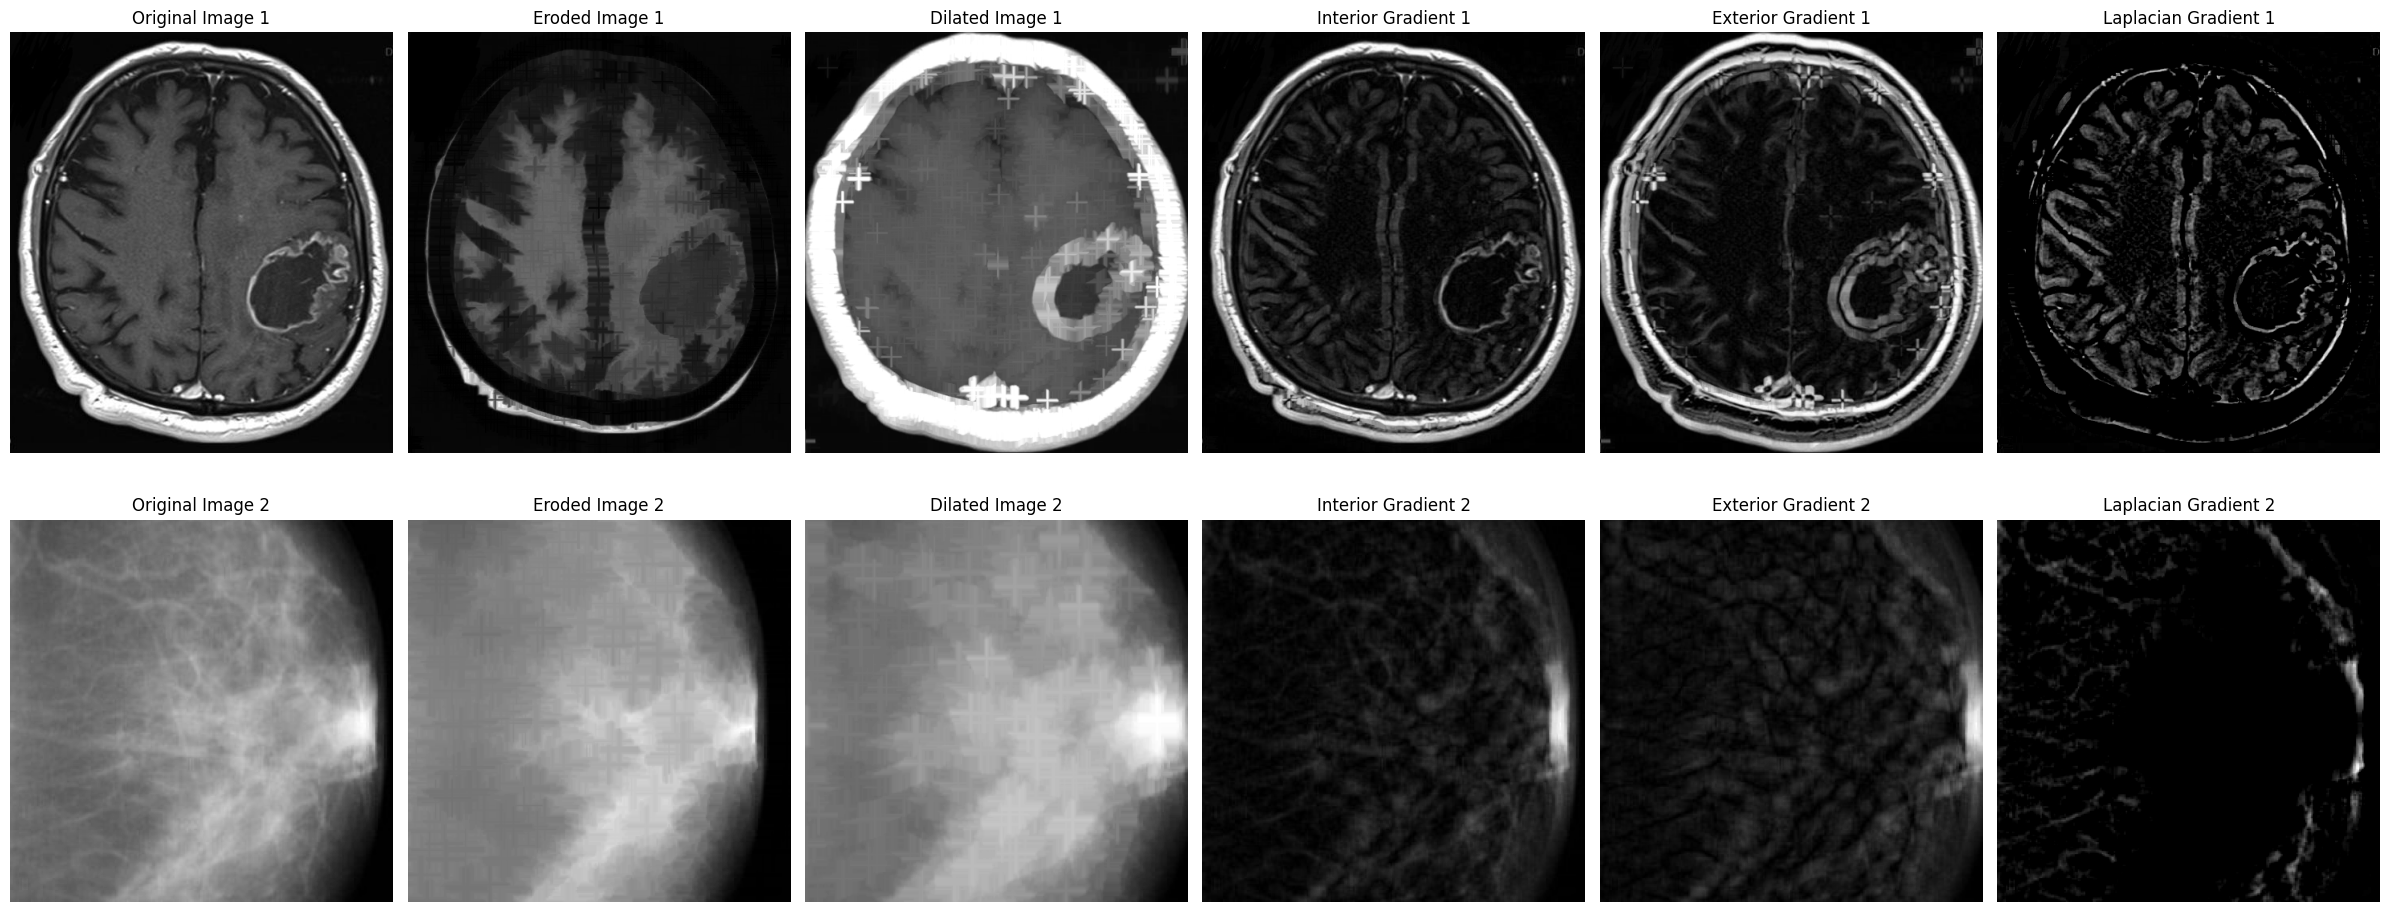

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in grayscale
image1 = cv2.imread('RMS_516_821_fig01_i1200.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('breast256.png', cv2.IMREAD_GRAYSCALE)


# Create an elliptical kernel (25x25)
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))

# Apply opening to both images
opened_image1 = cv2.morphologyEx(image1, cv2.MORPH_OPEN, kernel)
opened_image2 = cv2.morphologyEx(image2, cv2.MORPH_OPEN, kernel)

# Apply closing to both images
closed_image1 = cv2.morphologyEx(image1, cv2.MORPH_CLOSE, kernel)
closed_image2 = cv2.morphologyEx(image2, cv2.MORPH_CLOSE, kernel)

# Calculate top-hat transformation: Original - Opening
top_hat_image1 = cv2.subtract(image1, opened_image1)
top_hat_image2 = cv2.subtract(image2, opened_image2)

# Calculate conjugate top-hat transformation: Closing - Original
conjugate_top_hat_image1 = cv2.subtract(closed_image1, image1)
conjugate_top_hat_image2 = cv2.subtract(closed_image2, image2)

# Set up subplots to show 6 images in 2 rows, 3 columns each
fig, axes = plt.subplots(2, 6, figsize=(24, 10))

# Plot images for the first image (RMS_516_821_fig01_i1200.jpg)
axes[0, 0].imshow(image1, cmap='gray')
axes[0, 0].set_title('Original Image 1')
axes[0, 0].axis('off')

axes[0, 1].imshow(opened_image1, cmap='gray')
axes[0, 1].set_title('Opened Image 1')
axes[0, 1].axis('off')

axes[0, 2].imshow(top_hat_image1, cmap='gray')
axes[0, 2].set_title('Top-Hat Image 1')
axes[0, 2].axis('off')

axes[0, 3].imshow(closed_image1, cmap='gray')
axes[0, 3].set_title('Closed Image 1')
axes[0, 3].axis('off')

axes[0, 4].imshow(conjugate_top_hat_image1, cmap='gray')
axes[0, 4].set_title('Conjugate Top-Hat Image 1')
axes[0, 4].axis('off')

# Plot images for the second image (beast256.png)
axes[1, 0].imshow(image2, cmap='gray')
axes[1, 0].set_title('Original Image 2')
axes[1, 0].axis('off')

axes[1, 1].imshow(opened_image2, cmap='gray')
axes[1, 1].set_title('Opened Image 2')
axes[1, 1].axis('off')

axes[1, 2].imshow(top_hat_image2, cmap='gray')
axes[1, 2].set_title('Top-Hat Image 2')
axes[1, 2].axis('off')

axes[1, 3].imshow(closed_image2, cmap='gray')
axes[1, 3].set_title('Closed Image 2')
axes[1, 3].axis('off')

axes[1, 4].imshow(conjugate_top_hat_image2, cmap='gray')
axes[1, 4].set_title('Conjugate Top-Hat Image 2')
axes[1, 4].axis('off')

# Adjust layout and show all images in a grid
plt.tight_layout()
plt.show()


Gabor Kernel filter (to detect edges and details)

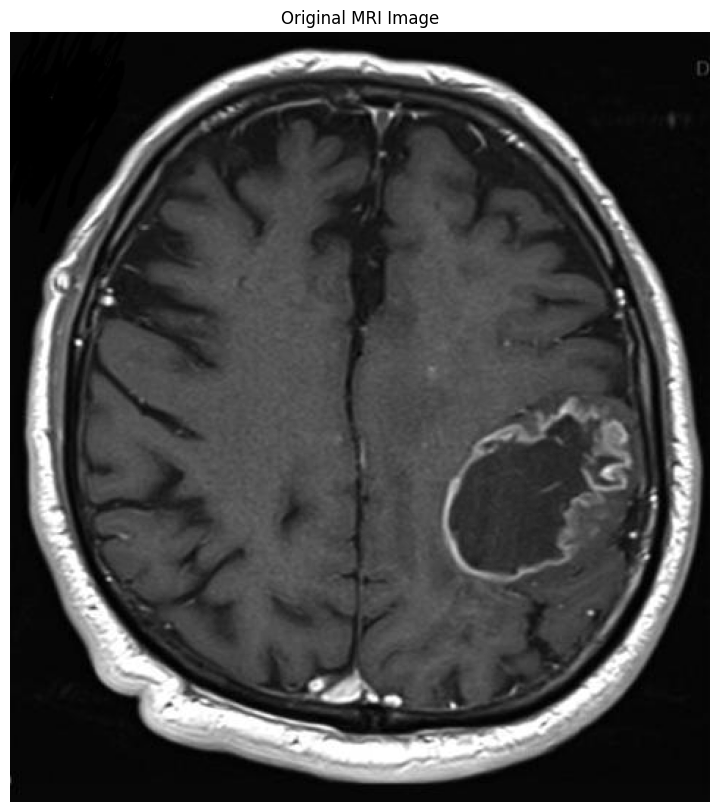

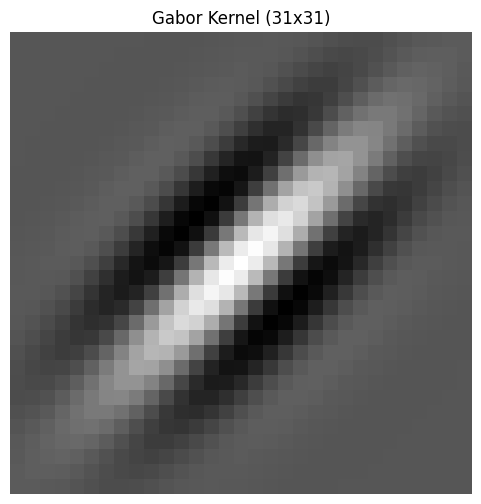

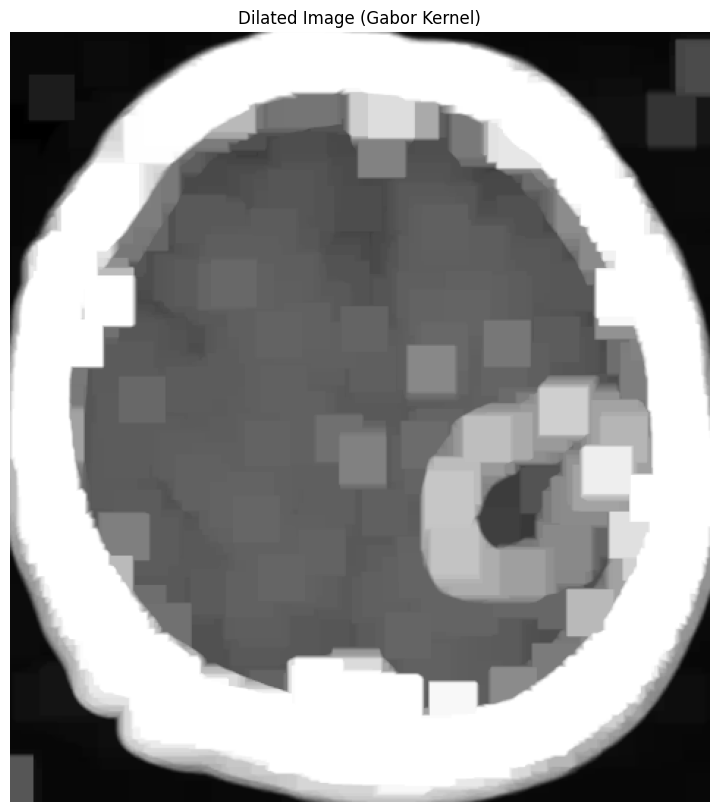

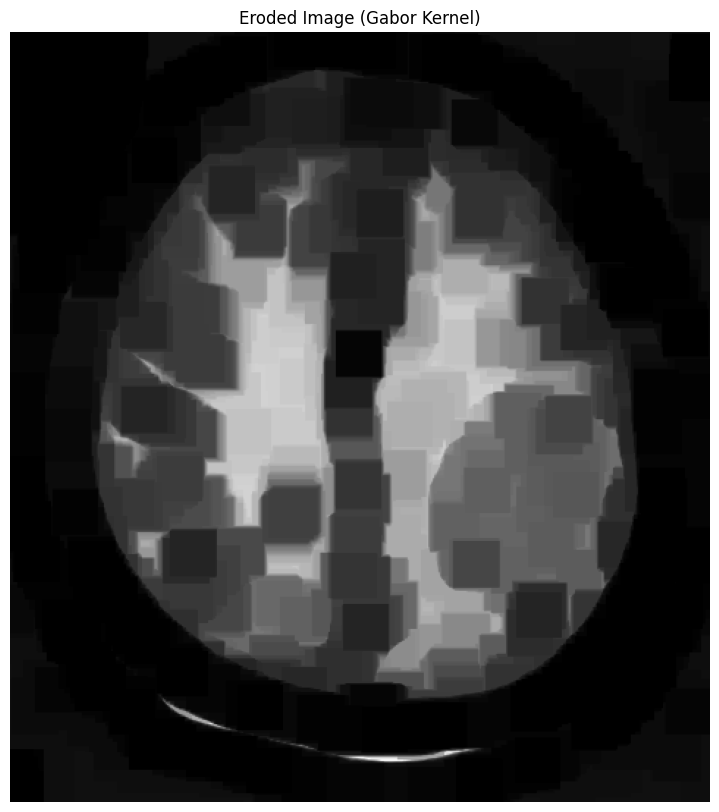

In [22]:
# Gabor kernel parameters
ksize = 31  # Size of the filter
sigma = 4.0  # Standard deviation of the Gaussian envelope
theta = np.pi / 4  # Orientation of the filter (45 degrees)
lambd = 10.0  # Wavelength of the sinusoidal factor
gamma = 0.5  # Spatial aspect ratio
psi = 0  # Phase offset

# Create a Gabor kernel
gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)

# Normalize the Gabor kernel
gabor_kernel /= gabor_kernel.sum()

# Perform dilation using the Gabor kernel
dilated_image = cv2.dilate(image, gabor_kernel)

# Perform erosion using the Gabor kernel
eroded_image = cv2.erode(image, gabor_kernel)

# Display original image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')
plt.title('Original MRI Image')
plt.axis('off')
plt.show()

# Display the Gabor kernel
plt.figure(figsize=(6,6))
plt.imshow(gabor_kernel, cmap='gray', interpolation='nearest')
plt.title('Gabor Kernel (31x31)')
plt.axis('off')
plt.show()

# Display dilated image
plt.figure(figsize=(10,10))
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image (Gabor Kernel)')
plt.axis('off')
plt.show()

# Display eroded image
plt.figure(figsize=(10,10))
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image (Gabor Kernel)')
plt.axis('off')
plt.show()